# Machine Learning - Andrew Ng ( Python Implementation)

## K-means Clustering

### Loading of Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 

In [2]:
mat = loadmat("ex7data2.mat")
X = mat["X"]

### Finding closest centroids

$c^{(i)} := j$ that minimizes $\|x^{(i)} - u_j\|^2$

In [3]:
def findClosestCentroids(X, centroids):
    """
    Returns the closest centroids in idx for a dataset X where each row is a single example.
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
    temp = np.zeros((centroids.shape[0],1))
    
    for i in range(X.shape[0]):
        for j in range(K):
            dist = X[i,:] - centroids[j,:]
            length = np.sum(dist**2)
            temp[j] = length
        idx[i] = np.argmin(temp)+1
    return idx

In [4]:
# Select an initial set of centroids
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [[1.]
 [3.]
 [2.]]


### Computing centroid means

$u_k := \frac{1}{C_k} \Sigma_{i\in C_k}x^{(i)}$

In [5]:
def computeCentroids(X, idx, K):
    """
    returns the new centroids by computing the means of the data points assigned to each centroid.
    """
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((K,n))
    count = np.zeros((K,1))
    
    for i in range(m):
        index = int((idx[i]-1)[0])
        centroids[index,:]+=X[i,:]
        count[index]+=1
    
    return centroids/count

In [6]:
centroids = computeCentroids(X, idx, K)
print("Centroids computed after initial finding of closest centroids:\n", centroids)

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### Visualizing K-means Clustering

In [7]:
def plotKmeans(X, centroids, idx, K, num_iters):
    """
    plots the data points with colors assigned to each centroid
    """
    m,n = X.shape[0],X.shape[1]
    
    fig, ax = plt.subplots(nrows=num_iters,ncols=1,figsize=(6,36))
    
    for i in range(num_iters):    
        # Visualisation of data
        color = "rgb"
        for k in range(1,K+1):
            grp = (idx==k).reshape(m,1)
            ax[i].scatter(X[grp[:,0],0],X[grp[:,0],1],c=color[k-1],s=15)

        # visualize the new centroids
        ax[i].scatter(centroids[:,0],centroids[:,1],s=120,marker="x",c="black",linewidth=3)
        title = "Iteration Number " + str(i)
        ax[i].set_title(title)
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)
        
        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, centroids)
    
    plt.tight_layout()

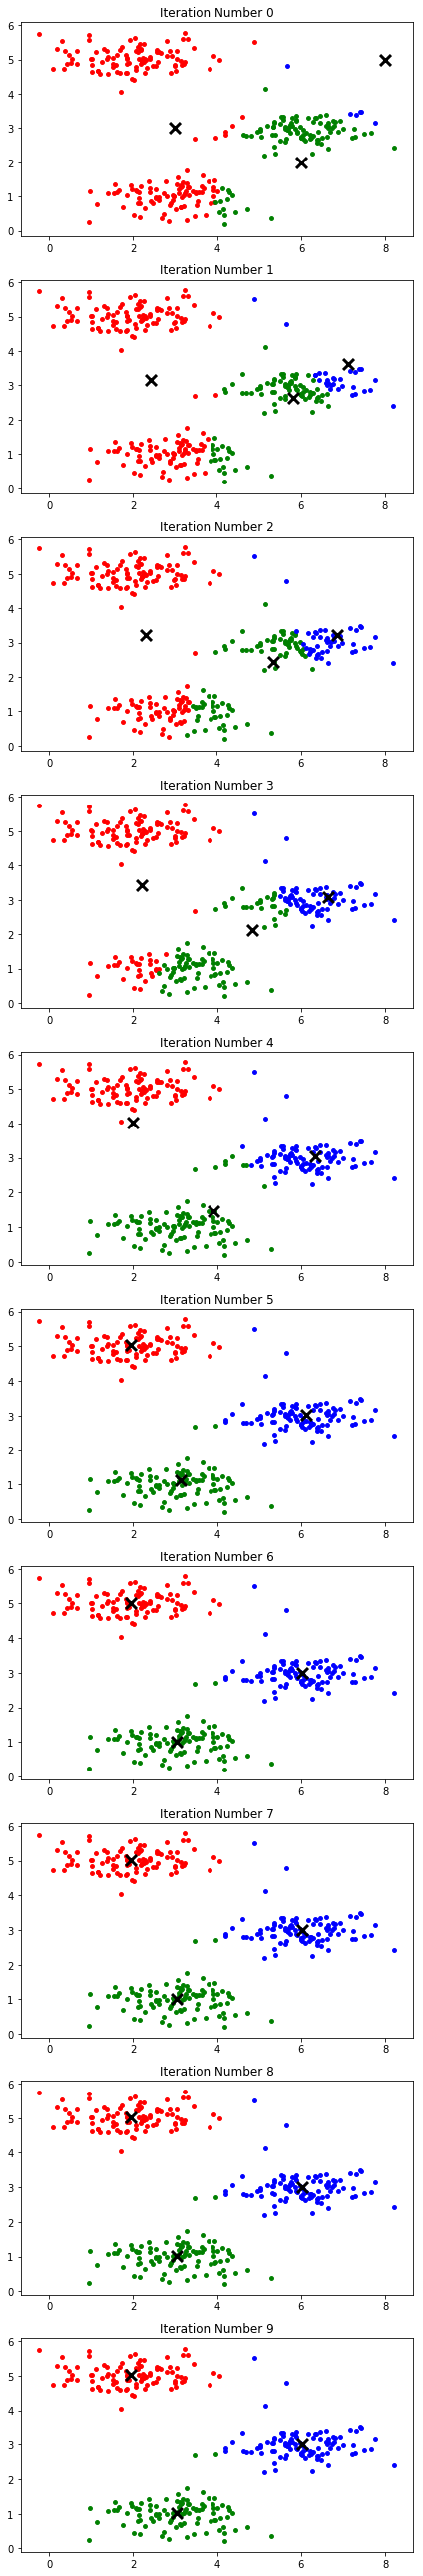

In [8]:
m,n = X.shape[0],X.shape[1]
plotKmeans(X, initial_centroids,idx, K,10)

### Random Initialization

In [9]:
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to beused in K-Means on the dataset X
    """
    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((K,n))
    
    for i in range(K):
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids

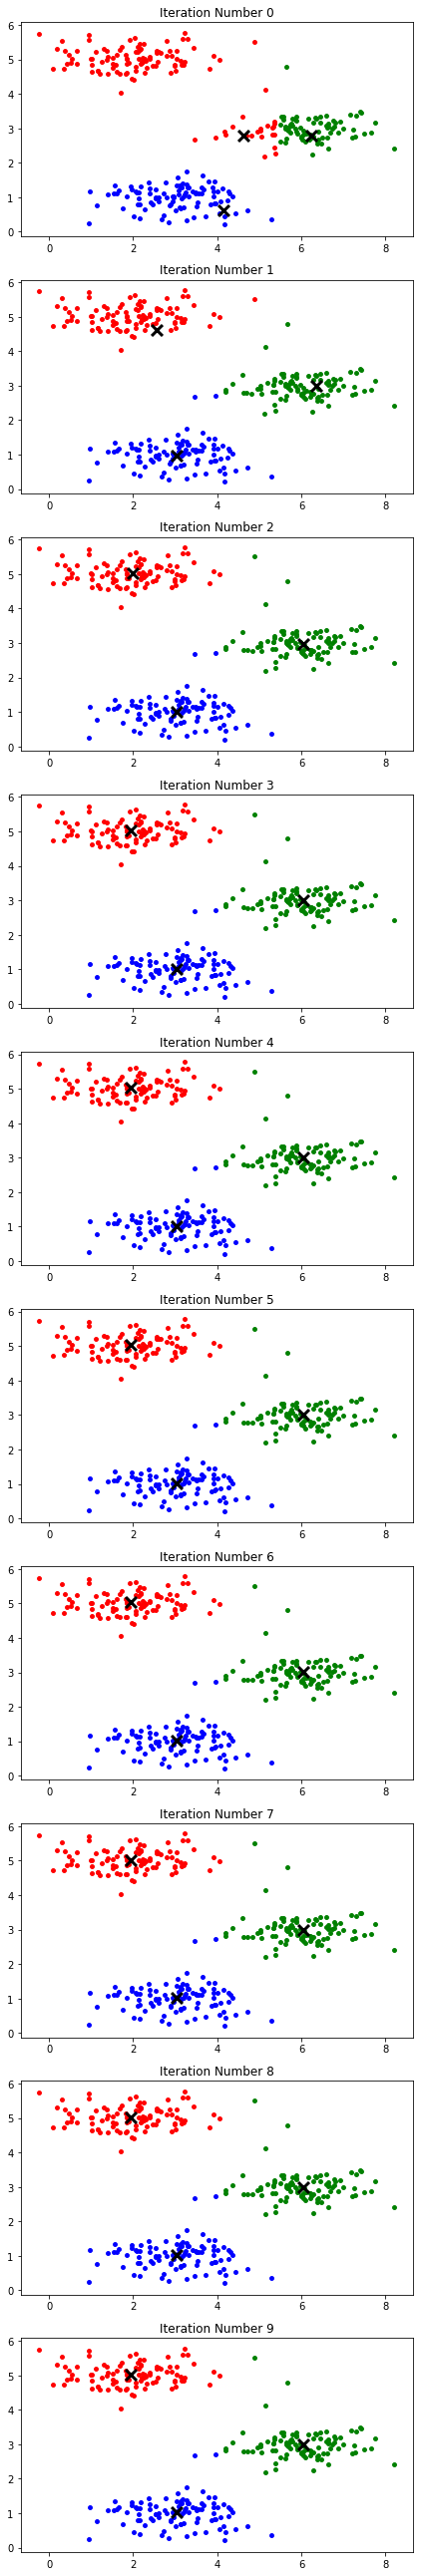

In [10]:
centroids = kMeansInitCentroids(X, K)
idx = findClosestCentroids(X, centroids)
plotKmeans(X, centroids,idx, K,10)

### Image Compression with K-means

In [11]:
mat2 = loadmat("bird_small.mat")
A = mat2["A"]

# preprocess and reshape the image
X2 = (A/255).reshape(128*128,3)

In [12]:
def runKmeans(X, initial_centroids,num_iters,K):
    
    idx = findClosestCentroids(X, initial_centroids)
    
    for i in range(num_iters):
        
        # Compute the centroids mean
        centroids = computeCentroids(X, idx, K)

        # assign each training example to the nearest centroid
        idx = findClosestCentroids(X, initial_centroids)

        
    return centroids, idx

In [13]:
# Running K-means algorithm on the data
K2 = 16
num_iters = 10
initial_centroids2 = kMeansInitCentroids(X2, K2)
centroids2, idx2 = runKmeans(X2, initial_centroids2, num_iters,K2)

(-0.5, 127.5, 127.5, -0.5)

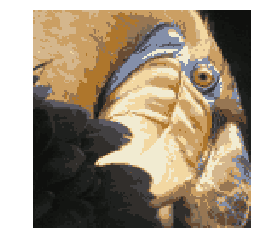

In [14]:
m2,n2 = X.shape[0],X.shape[1]
X2_recovered = X2.copy()
for i in range(1,K2+1):
    X2_recovered[(idx2==i).ravel(),:] = centroids2[i-1]

# Reshape the recovered image into proper dimensions
X2_recovered = X2_recovered.reshape(128,128,3)

# Display the image
import matplotlib.image as mpimg
plt.imshow(X2_recovered)
plt.axis("off")

## Principal Component Analysis

In [15]:
mat3 = loadmat("ex7data1.mat")
X3 = mat3["X"]

### Plotting the data

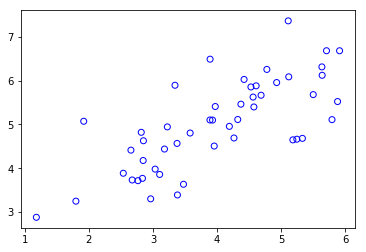

In [16]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")

### Implementing PCA

Covariance matrix is computed by $\sum = \frac{1}{m} X^TX$

In [17]:
def featureNormalize(X):
    """
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1.
    """
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma

In [18]:
def pca(X):
    """
    Computes eigenvectors of the covariance matrix of X
    """
    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    
    U,S,V = svd(sigma)
    
    return U,S,V

In [19]:
from numpy.linalg import svd
X_norm,mu,std = featureNormalize(X3)
U,S = pca(X_norm)[:2]

### Visualizing PCA

(2, 8)

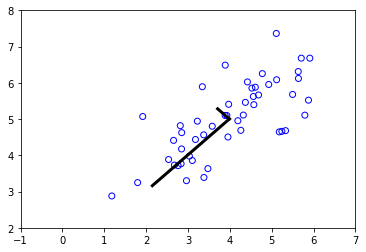

In [21]:
plt.scatter(X3[:,0],X3[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

In [22]:
print("Top eigenvector U(:,1) =:",U[:,0])

Top eigenvector U(:,1) =: [-0.70710678 -0.70710678]


### Dimensionality reduction with PCA

In [23]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top k eigenvectors
    """
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z

In [24]:
# Project the data onto K=1 dimension
K=1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578515


### Reconstructing an approximation of the data

In [25]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data
    """
    m,n = Z.shape[0],U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec

In [26]:
X_rec  = recoverData(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


### Visualizing the projections

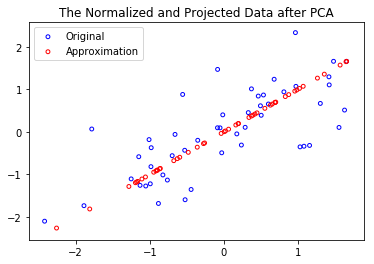

In [27]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

### Face Image Dataset

In [28]:
mat4 = loadmat("ex7faces.mat")
X4 = mat4["X"]

### Visualizing the dataset

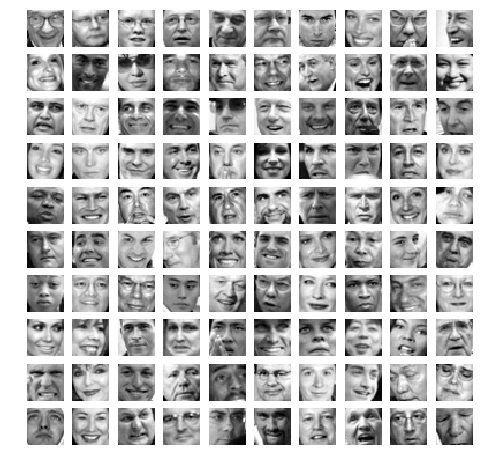

In [29]:
fig, ax = plt.subplots(nrows=10,ncols=10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax[int(i/10),j].imshow(X4[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

### PCA on face

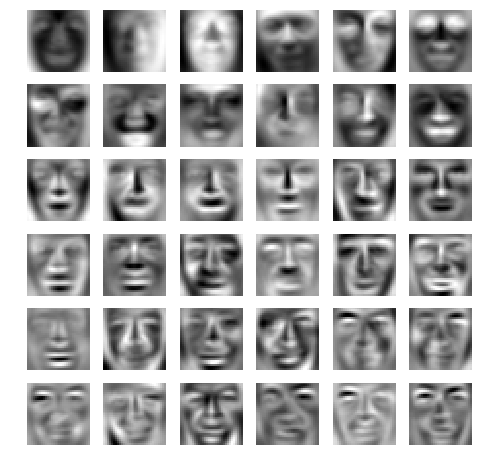

In [30]:
X_norm2 = featureNormalize(X4)[0]

# Run PCA
U2 =pca(X_norm2)[0]

#Visualize the top 36 eigenvectors found
U_reduced = U2[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

In [34]:
K2 = 100
Z2 = projectData(X_norm2, U2, K2)
print("The projected data Z has a size of:",Z2.shape)

The projected data Z has a size of: (5000, 100)


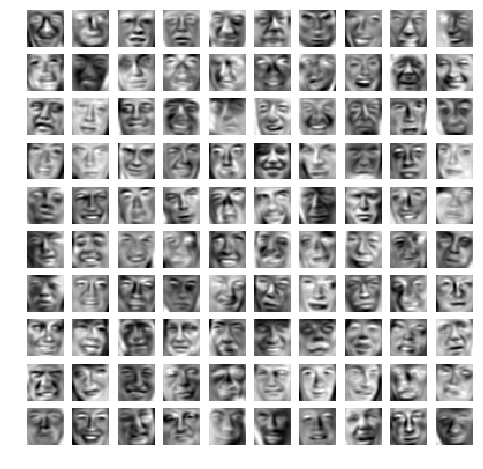

In [36]:
# Data reconstruction
X_rec2  = recoverData(Z2, U2, K2)

# Visualize the reconstructed data
fig3, ax3 = plt.subplots(10,10,figsize=(8,8))
for i in range(0,100,10):
    for j in range(10):
        ax3[int(i/10),j].imshow(X_rec2[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax3[int(i/10),j].axis("off")